In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data1= pd.read_csv('tweet_emotions.csv')
data2=pd.read_csv('text.csv')

In [4]:
data2.head()

,tweet_id,content,sentiment
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
data2.dtypes

,0
tweet_id,int64
content,object
sentiment,int64


In [6]:
data2['sentiment']=data2['sentiment'].astype(str)

In [7]:
data2.dtypes

,0
tweet_id,int64
content,object
sentiment,object


In [8]:
def replace_numbers(text):
  replacements={'0':'sadness','1':'happiness','2':'love','3':'anger','4':'fear','5':'surprise'}
  for num,word in replacements.items():
    text=text.replace(num,word)
  return text


In [9]:
data2['sentiment']=data2['sentiment'].apply(replace_numbers)

In [10]:
data2.head()

,tweet_id,content,sentiment
0,0,i just feel really helpless and heavy hearted,fear
1,1,ive enjoyed being able to slouch about relax a...,sadness
2,2,i gave up my internship with the dmrg and am f...,fear
3,3,i dont know i feel so lost,sadness
4,4,i am a kindergarten teacher and i am thoroughl...,fear


In [11]:
data1.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [12]:
data = pd.concat([data1,data2],ignore_index=True)

In [13]:
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
456804,416804,love,i feel like telling these horny devils to find...
456805,416805,anger,i began to realize that when i was feeling agi...
456806,416806,surprise,i feel very curious be why previous early dawn...
456807,416807,anger,i feel that becuase of the tyranical nature of...


In [14]:
data = data.drop(columns=['tweet_id'])

In [15]:
data= data.drop_duplicates(subset='content')

In [16]:
sentiments = data['sentiment'].unique()
print(sentiments)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger' 'fear']


<Axes: xlabel='count', ylabel='sentiment'>

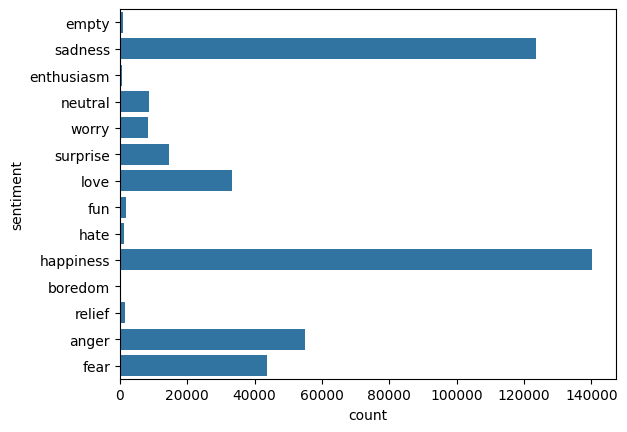

In [17]:
sns.countplot(y='sentiment',data=data)

In [18]:
sentiment_label={'empty': 'negative', 'sadness': 'negative', 'worry': 'negative', 'hate': 'negative',
    'boredom': 'negative', 'anger': 'negative', 'enthusiasm': 'positive', 'neutral': 'neutral',
    'surprise': 'neutral', 'love': 'positive', 'fun': 'positive', 'happiness': 'positive', 'relief': 'positive','fear':'negative',
                }
data['label']= data['sentiment'].map(sentiment_label)

In [19]:
data.head()

,sentiment,content,label
0,empty,@tiffanylue i know i was listenin to bad habi...,negative
1,sadness,Layin n bed with a headache ughhhh...waitin o...,negative
2,sadness,Funeral ceremony...gloomy friday...,negative
3,enthusiasm,wants to hang out with friends SOON!,positive
4,neutral,@dannycastillo We want to trade with someone w...,neutral


In [20]:
data = data.drop(columns=['sentiment'])


In [21]:
data.head()

,content,label
0,@tiffanylue i know i was listenin to bad habi...,negative
1,Layin n bed with a headache ughhhh...waitin o...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,@dannycastillo We want to trade with someone w...,neutral


In [22]:
class_count = data['label'].value_counts()
class_count

,count
label,
negative,232938
positive,177522
neutral,23186


In [23]:
min_count=min(class_count)
min_count

23186

In [24]:
balanced_data = pd.concat([data[data['label']==label].sample(min_count,random_state=42) for label in class_count.index])

In [25]:
balanced_data['label'].value_counts()

,count
label,
negative,23186
positive,23186
neutral,23186


<Axes: xlabel='count', ylabel='label'>

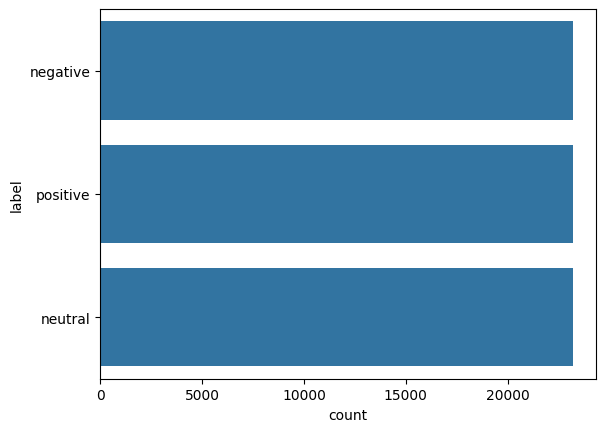

In [26]:
sns.countplot(y='label',data=balanced_data)

In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
def clean_data(text):
    text = re.sub(r'\W', ' ', text.lower())
    tokenized_text = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words]
    return ' '.join( lemmatized_text)

In [33]:
balanced_data['cleaned_content']=balanced_data['content'].apply(clean_data)

In [34]:
label_map = {'negative':0,'positive':1,'neutral':2}
balanced_data['encoded_label']=balanced_data['label'].map(label_map)
balanced_data

,content,label,cleaned_content,encoded_label
395981,i feel like i m supposed to be learning about ...,negative,feel like supposed learning love feel kinda bl...,0
283731,i feel completely defeated in the mom departme...,negative,feel completely defeated mom department lately,0
70226,i am still feeling a bit stressed but not as s...,negative,still feeling bit stressed stressed cry consta...,0
160290,i see the united states flag lowered because o...,negative,see united state flag lowered act terrorism se...,0
6860,@tommcfly I'm starting to get really dizzy. Do...,negative,tommcfly starting get really dizzy tour philip...,0
...,...,...,...,...
72688,i feel like everyone does shocked horrified sa...,neutral,feel like everyone shocked horrified saddened ...,2
390445,i have a strong feeling it wasn t god because ...,neutral,strong feeling god thinking like normally woul...,2
21830,sarah_marie_711 two weeks will fly by,neutral,sarah_marie_711 two week fly,2
3350,Moodle Intro training this morning... ages sin...,neutral,moodle intro training morning age since done 2...,2


In [35]:
X= balanced_data['cleaned_content']
Y_encoded= balanced_data['encoded_label']

In [36]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [37]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y_encoded, test_size=0.2, random_state=42)

In [39]:
rf_model = RandomForestClassifier(random_state=42)


In [40]:
rf_grid= {'n_estimators':[50,150,200],'max_depth':[5,10,15]}
rf_gridsearch = GridSearchCV(rf_model,rf_grid,cv=3,scoring='accuracy',verbose=1)
rf_gridsearch.fit(X_train,Y_train)
print("best para:",rf_gridsearch.best_params_)
best_rf=rf_gridsearch.best_estimator_


Fitting 3 folds for each of 9 candidates, totalling 27 fits
best para: {'max_depth': 15, 'n_estimators': 200}


In [41]:
Y_prediction = best_rf.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, Y_prediction))
print("Accuracy:", accuracy_score(Y_test, Y_prediction))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_prediction))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      4579
           1       0.94      0.85      0.89      4703
           2       0.82      0.93      0.87      4630

    accuracy                           0.88     13912
   macro avg       0.89      0.88      0.88     13912
weighted avg       0.89      0.88      0.88     13912

Accuracy: 0.8814692351926394
Confusion Matrix:
 [[3973  121  485]
 [ 222 3994  487]
 [ 187  147 4296]]


In [42]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

#checking if the model is overfitting
#condition: if training accuracy - testing accuracy >5 =Overfitting
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.92
Training Accuracy: 0.9934
Testing Accuracy: 0.9211


In [43]:
#initializing the Decision Tree model.
tree_model = DecisionTreeClassifier( random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=10)
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(Y_test, tree_pred)
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

#checking if the model is overfitted/underfitted
#condition: if training accuracy - testing accuracy >5 =Overfitting
y_train_pred = tree_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {tree_accuracy:.4f}")

Decision Tree Accuracy: 0.62
Training Accuracy: 0.6216
Testing Accuracy: 0.6203


In [44]:
reverse_label={v:k for k,v in label_map.items()}

In [45]:
def predict_emotion(user_input):
    clean_input = clean_data(user_input)
    user_input_tfidf = tfidf_vectorizer.transform([clean_input])
    prediction= best_rf.predict(user_input_tfidf)
    predicted_emotion = reverse_label[prediction[0]]
    return predicted_emotion

In [46]:
user_input = input("Leave Review :  ")
emotion_predicted = predict_emotion(user_input)
print(f"the emotion is :{emotion_predicted}")

Leave Review :  This is terrible
the emotion is :neutral
